NAME - **Janvi Vijay**
# TASK1- Predict the percentage of a student based on the number of study hours using SUPERVISED LEARNING.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Reading the data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Shape of data
data.shape

(25, 2)

## Plotting the scores 

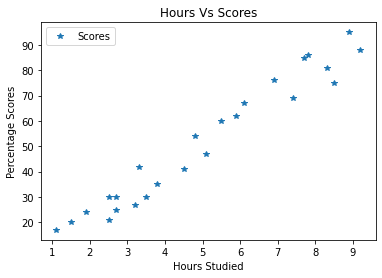

In [4]:
data.plot(x ='Hours', y='Scores', style='*')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Scores')
plt.show()

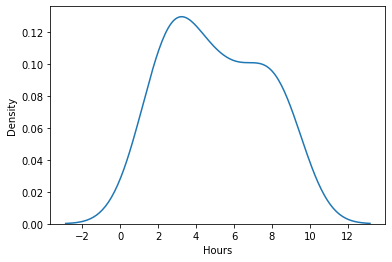

In [5]:
sns.kdeplot(data['Hours'])
plt.show()

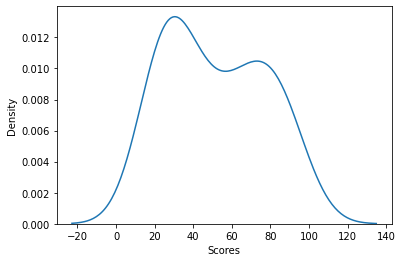

In [6]:
sns.kdeplot(data['Scores'])
plt.show()

## Training the model 

In [7]:
# Divide the data into attributes and labels

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
# Split data into training and testing data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [9]:
# Training model

lr = LinearRegression()

In [10]:
# Fit the data into model

lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# Find intercept and coefficient of model

print(f'Intercept: {lr.intercept_}')
print(f'Coefficient: {lr.coef_}')

Intercept: 2.018160041434683
Coefficient: [9.91065648]


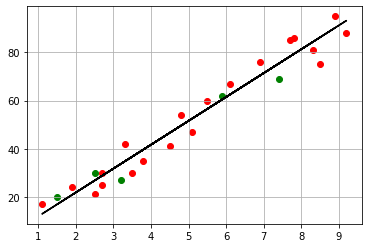

In [12]:
# Plot the regression line

line = lr.intercept_+lr.coef_*x
plt.scatter(x_train,y_train,color = 'red',label = 'Train Data')
plt.scatter(x_test,y_test,color = 'green',label = 'Test Data')
plt.plot(x,line,color = 'black',label = 'Regression Line')
plt.grid()

## Prediction using x_test 

In [13]:
y_pred = lr.predict(x_test)

In [14]:
prediction = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
prediction

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


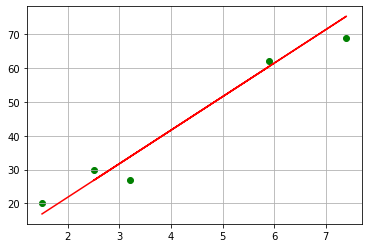

In [15]:
# Plot Actual Vs Predicted value

plt.scatter(x_test,y_test,color = 'green',label = 'Test Data')
plt.plot(x_test,y_pred,color = 'red')
plt.grid()

## Training & Testing Accuracy 

In [16]:
print(f'Training Accuracy: {lr.score(x_train,y_train)}')
print(f'Testing Accuracy: {lr.score(x_test,y_test)}')

Training Accuracy: 0.9515510725211552
Testing Accuracy: 0.9454906892105356


## Given prediction in task 

In [17]:
hrs = [9.25]
pred = lr.predict([hrs])
print("No of Hours = {}".format(hrs))
print("Predicted Scores = {}".format(pred))

No of Hours = [9.25]
Predicted Scores = [93.69173249]


## Evaluation of model 

In [18]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"Maximum Error: {metrics.max_error(y_test,y_pred)}")

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean squared Error: 4.6474476121003665
Maximum Error: 6.732260779489842
